# San Francisco Housing Cost Analysis

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv


In [9]:
# Mapbox API key (need to move over env)
load_dotenv()
mapbox_api = os.getenv("mapbox")

## Load Data

In [10]:
# Read in census data as df
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


## Housing Units/ Yr

**Optional Challenge:** Use max, min, & std to scale y limits of chart

In [11]:
# Calc mean housing units/yr 
sfo_data["housing_units"].groupby("year").mean()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [13]:
# Save the df as a csv
mean_units_per_yr = sfo_data["housing_units"].groupby("year").mean()
mean_units_per_yr.to_csv("Data/mean_units_yr.csv",header=False)
# 

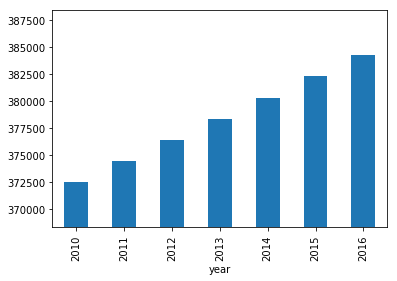

In [17]:
# plot avg housing/yr
fig_mean_units = plt.figure()

mean_units_plot= mean_units_per_yr.plot.bar()

min_lim = mean_units_per_yr.min() - mean_units_per_yr.std()
max_lim = mean_units_per_yr.max() + mean_units_per_yr.std()
mean_units_plot.set_ylim(min_lim, max_lim)

# show and close to make sure the limits above don't affect later plots
plt.show()
plt.close(fig_mean_units)

In [18]:
# double bracket to call multiple columns
avg_house_cost=sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
avg_house_cost

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


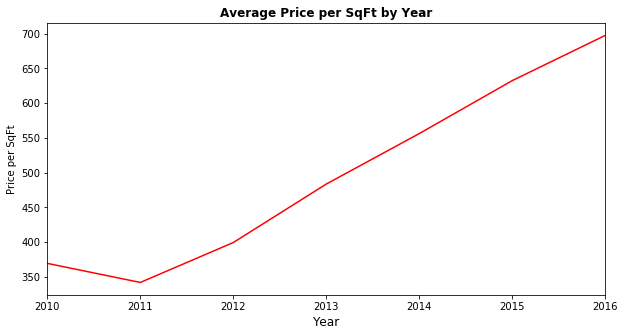

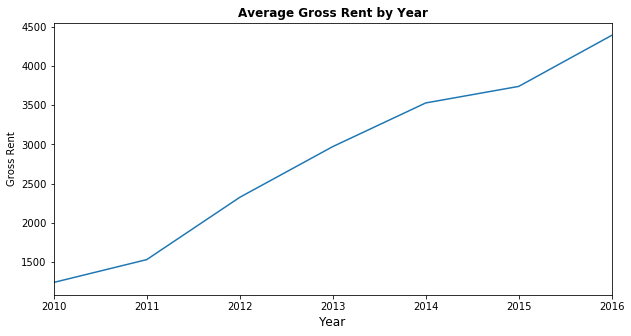

In [32]:
# avg sale price & avg gross rent line plots
fig_mean_units = plt.figure()

sales_sqft_plot= avg_house_cost["sale_price_sqr_foot"].plot(color="red",figsize=(10,5))
# set_ to label title, x-axis, and y axis
sales_sqft_plot.set_title("Average Price per SqFt by Year",fontweight="bold")
sales_sqft_plot.set_xlabel("Year",fontsize=12)
sales_sqft_plot.set_ylabel("Price per SqFt")

plt.show()
plt.close(fig_mean_units)

fig_mean_units = plt.figure()

gross_rent_plot= avg_house_cost["gross_rent"].plot(figsize=(10,5))

gross_rent_plot.set_title("Average Gross Rent by Year",fontweight="bold")
gross_rent_plot.set_xlabel("Year",fontsize=12)
gross_rent_plot.set_ylabel("Gross Rent")

plt.show()
plt.close(fig_mean_units)

In [35]:
avg_price_neigh= sfo_data.groupby([sfo_data.index,"neighborhood"]).mean()
avg_price_neigh.reset_index(inplace=True)
avg_price_neigh.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [47]:
# 
avg_price_neigh.hvplot.line(
    x = "year",
    y = "sale_price_sqr_foot",
    groupby="neighborhood",
    xlabel="Year",
    ylabel="Price",
    title = "Average price per sqft by neighborhood"
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)